#Loss Optimization:

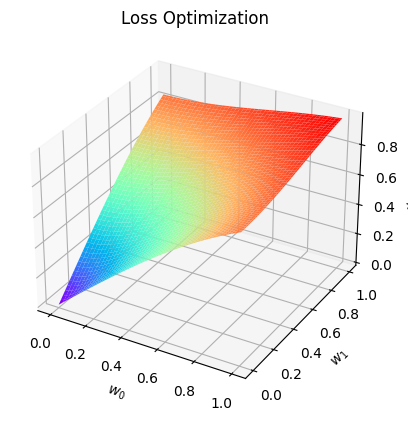

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la función de pérdida
def loss_function(w0, w1):
    return np.sin(np.sqrt(w0**2 + w1**2))

# Crear una malla de valores para w0 y w1
w0 = np.linspace(0, 1, 100)
w1 = np.linspace(0, 1, 100)
w0, w1 = np.meshgrid(w0, w1)
loss = loss_function(w0, w1)

# Crear la figura y el gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie
surf = ax.plot_surface(w0, w1, loss, cmap='rainbow')

# Añadir etiquetas y título
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_zlabel('$J(w_0, w_1)$')
ax.set_title('Loss Optimization')

# Mostrar el gráfico
plt.show()


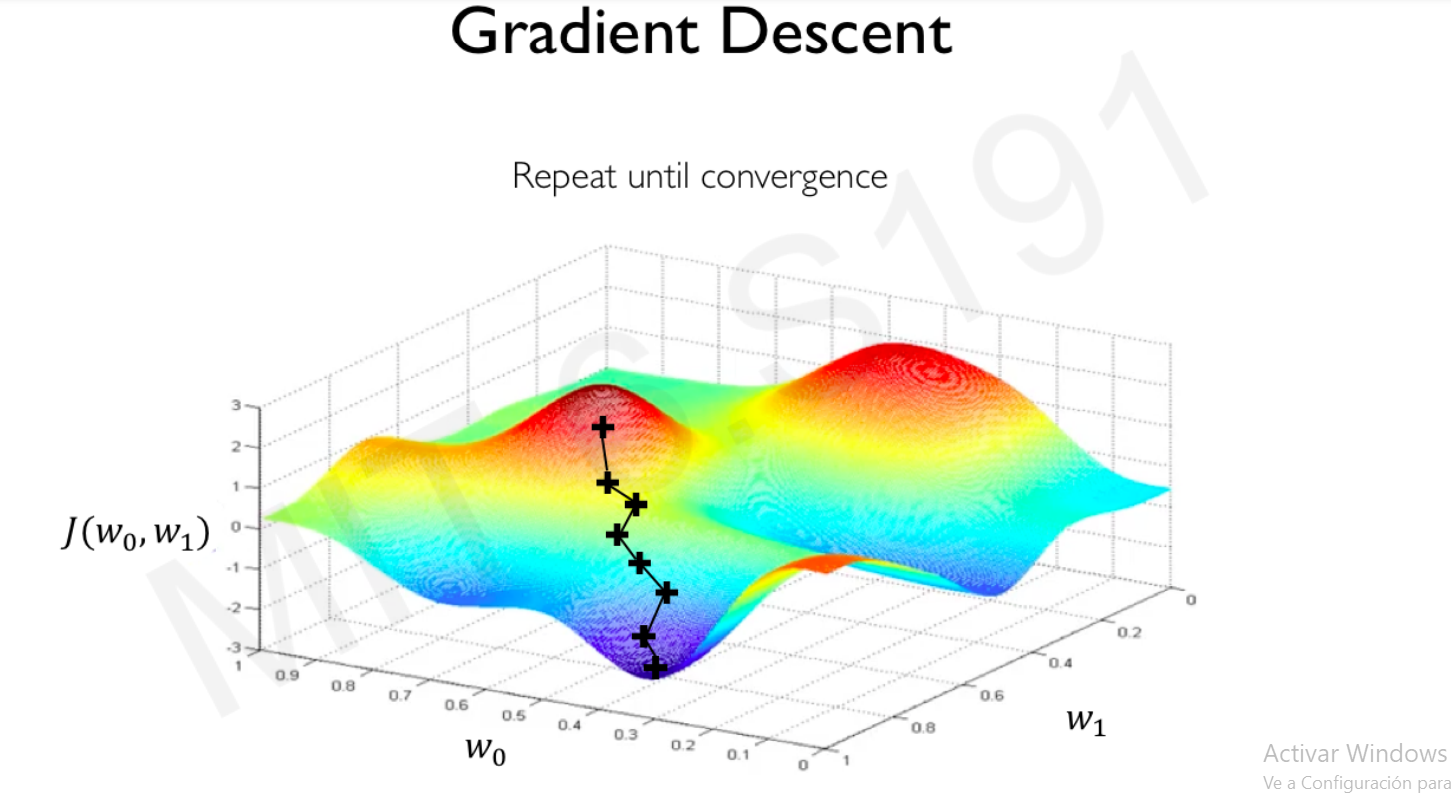

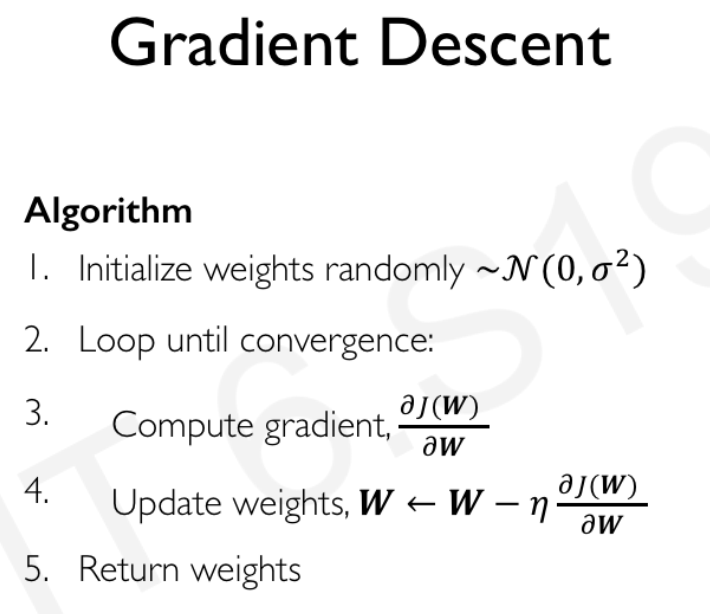

Iteration 0: Loss = 15.943180907173941
Iteration 100: Loss = 0.4079946326678474
Iteration 200: Loss = 0.4034455897104597
Iteration 300: Loss = 0.4032972801771356
Iteration 400: Loss = 0.4032924449364309
Iteration 500: Loss = 0.40329228729617583
Iteration 600: Loss = 0.40329228215673163
Iteration 700: Loss = 0.4032922819891735
Iteration 800: Loss = 0.40329228198371064
Iteration 900: Loss = 0.40329228198353273
Final weights: [4.21509612 2.77011342]


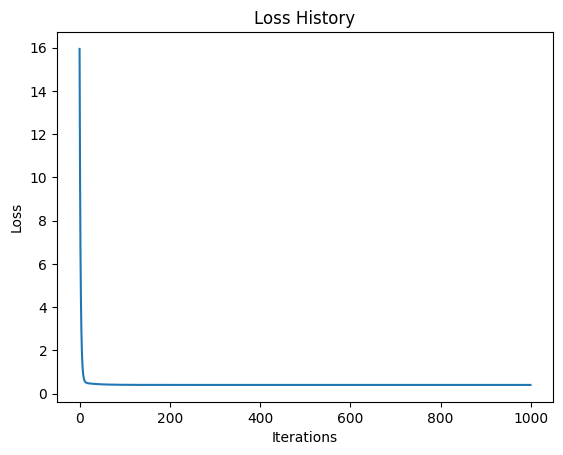

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function (e.g., mean squared error)
def loss_function(w, X, y):
    predictions = X.dot(w)
    errors = predictions - y
    return (1 / (2 * len(y))) * np.dot(errors.T, errors)

# Define the gradient of the loss function
def gradient(w, X, y):
    predictions = X.dot(w)
    errors = predictions - y
    return (1 / len(y)) * X.T.dot(errors)

# Gradient Descent algorithm
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    # Initialize weights to zeros
    w = np.zeros(X.shape[1])
    # Store the loss history for plotting
    loss_history = []

    for i in range(iterations):
        # Calculate the gradient
        grad = gradient(w, X, y)
        # Update the weights
        w = w - learning_rate * grad
        # Calculate the loss
        loss = loss_function(w, X, y)
        # Append the loss to the history
        loss_history.append(loss)

        # Print the loss every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}")

    return w, loss_history

# Example usage:
# Create a dummy dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term (column of ones) to the feature matrix
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Reshape y to be a 1-dimensional array
y = y.reshape(-1)

# Set learning rate and number of iterations
learning_rate = 0.1
iterations = 1000

# Perform Gradient Descent
weights, loss_history = gradient_descent(X_b, y, learning_rate, iterations)

# Print final weights and plot the loss history
print("Final weights:", weights)

plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()


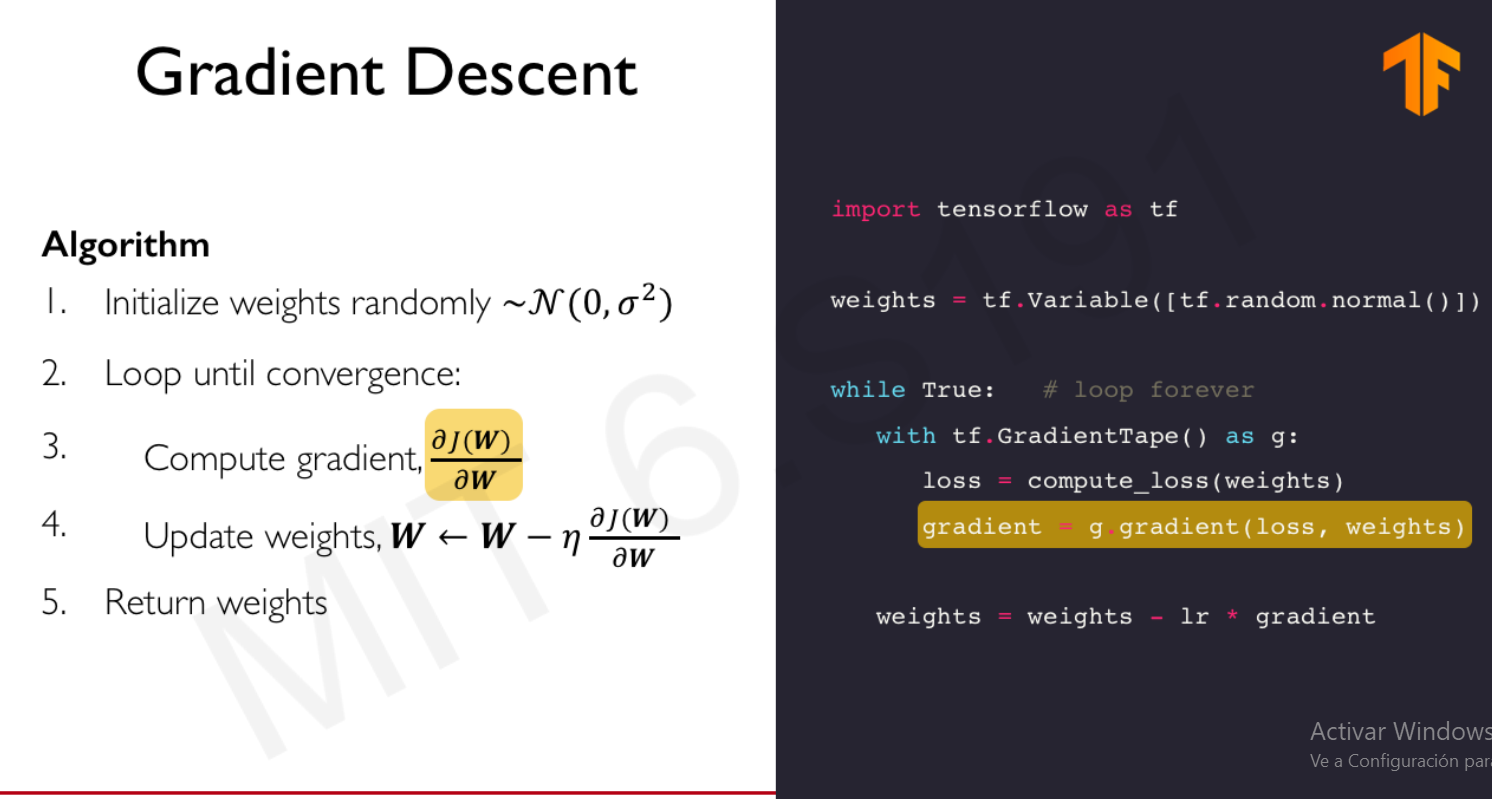

Iteration 0: Loss = 68.97222137451172
Iteration 100: Loss = 0.806589663028717
Iteration 200: Loss = 0.8065847158432007
Iteration 300: Loss = 0.8065847158432007
Iteration 400: Loss = 0.8065847158432007
Iteration 500: Loss = 0.8065847158432007
Iteration 600: Loss = 0.8065847158432007
Iteration 700: Loss = 0.8065847158432007
Iteration 800: Loss = 0.8065847158432007
Iteration 900: Loss = 0.8065847158432007
Final weights: [[4.215091 ]
 [2.7701175]]


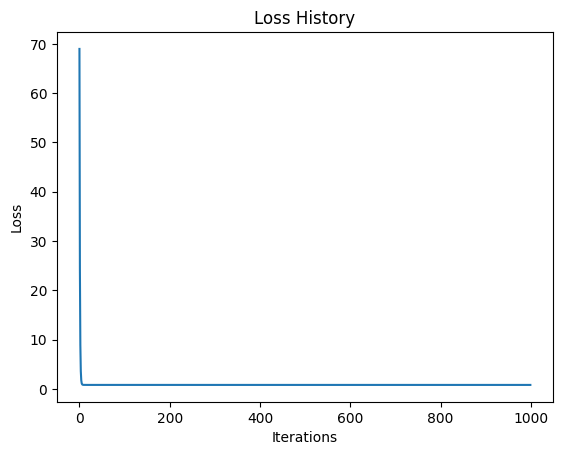

In [5]:
import tensorflow as tf

# Define the loss function
def compute_loss(weights, X, y):
    predictions = tf.matmul(X, weights)
    errors = predictions - y
    return tf.reduce_mean(tf.square(errors))

# Gradient Descent algorithm with TensorFlow
def gradient_descent_tf(X, y, learning_rate=0.01, iterations=1000):
    # Initialize weights
    weights = tf.Variable(tf.random.normal([X.shape[1], 1]), dtype=tf.float32)

    # Optimizer
    optimizer = tf.optimizers.SGD(learning_rate)

    # Loss history
    loss_history = []

    for i in range(iterations):
        with tf.GradientTape() as tape:
            loss = compute_loss(weights, X, y)

        # Calculate the gradients
        gradients = tape.gradient(loss, [weights])

        # Update the weights
        optimizer.apply_gradients(zip(gradients, [weights]))

        # Record the loss
        loss_history.append(loss.numpy())

        # Print the loss every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss.numpy()}")

    return weights, loss_history

# Example usage:
# Create a dummy dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term (column of ones) to the feature matrix
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Convert to TensorFlow tensors
X_b = tf.constant(X_b, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

# Set learning rate and number of iterations
learning_rate = 0.1
iterations = 1000

# Perform Gradient Descent
weights, loss_history = gradient_descent_tf(X_b, y, learning_rate, iterations)

# Print final weights and plot the loss history
print("Final weights:", weights.numpy())

plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

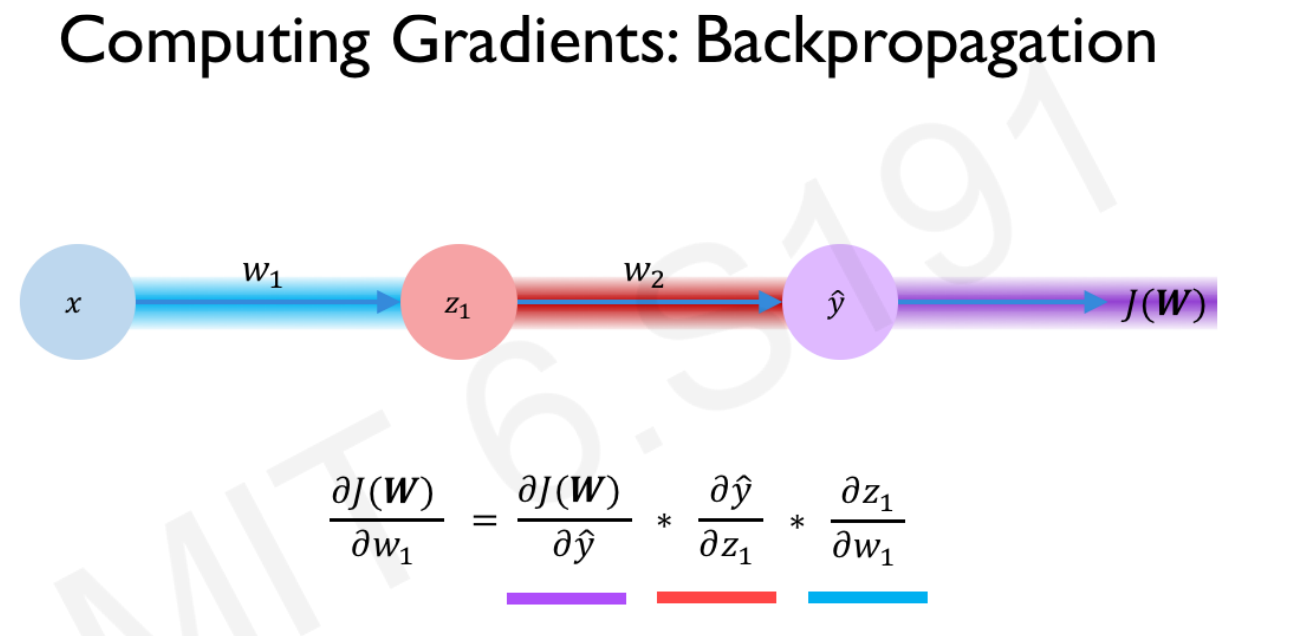

Iteration 0: Loss = 54.40520095825195
Iteration 100: Loss = 0.8147106170654297
Iteration 200: Loss = 0.8068822622299194
Iteration 300: Loss = 0.8065604567527771
Iteration 400: Loss = 0.8065498471260071
Iteration 500: Loss = 0.8065491318702698
Iteration 600: Loss = 0.8065492510795593
Iteration 700: Loss = 0.8065493106842041
Iteration 800: Loss = 0.8065493106842041
Iteration 900: Loss = 0.8065493106842041


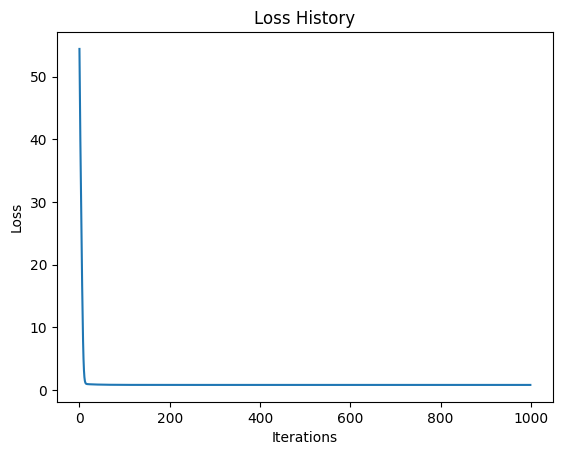

In [6]:
import tensorflow as tf
import numpy as np

# Define the model architecture
class SimpleNN(tf.keras.Model):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(10, activation='relu')  # Hidden layer with 10 neurons
        self.output_layer = tf.keras.layers.Dense(1)  # Output layer with 1 neuron

    def call(self, inputs):
        x = self.hidden_layer(inputs)
        return self.output_layer(x)

# Define the loss function (mean squared error)
def compute_loss(model, X, y):
    predictions = model(X)
    return tf.reduce_mean(tf.square(predictions - y))

# Backpropagation algorithm
def backpropagation(model, X, y, learning_rate=0.01, iterations=1000):
    # Optimizer
    optimizer = tf.optimizers.SGD(learning_rate)

    # Loss history
    loss_history = []

    for i in range(iterations):
        with tf.GradientTape() as tape:
            loss = compute_loss(model, X, y)

        # Calculate the gradients
        gradients = tape.gradient(loss, model.trainable_variables)

        # Update the weights
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Record the loss
        loss_history.append(loss.numpy())

        # Print the loss every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss.numpy()}")

    return model, loss_history

# Example usage:
# Create a dummy dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Convert to TensorFlow tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

# Initialize the model
model = SimpleNN()

# Set learning rate and number of iterations
learning_rate = 0.01
iterations = 1000

# Perform Backpropagation
model, loss_history = backpropagation(model, X, y, learning_rate, iterations)

# Plot the loss history
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()


1. Training NN is difficult
2. Loss functions can be difficult to optimize


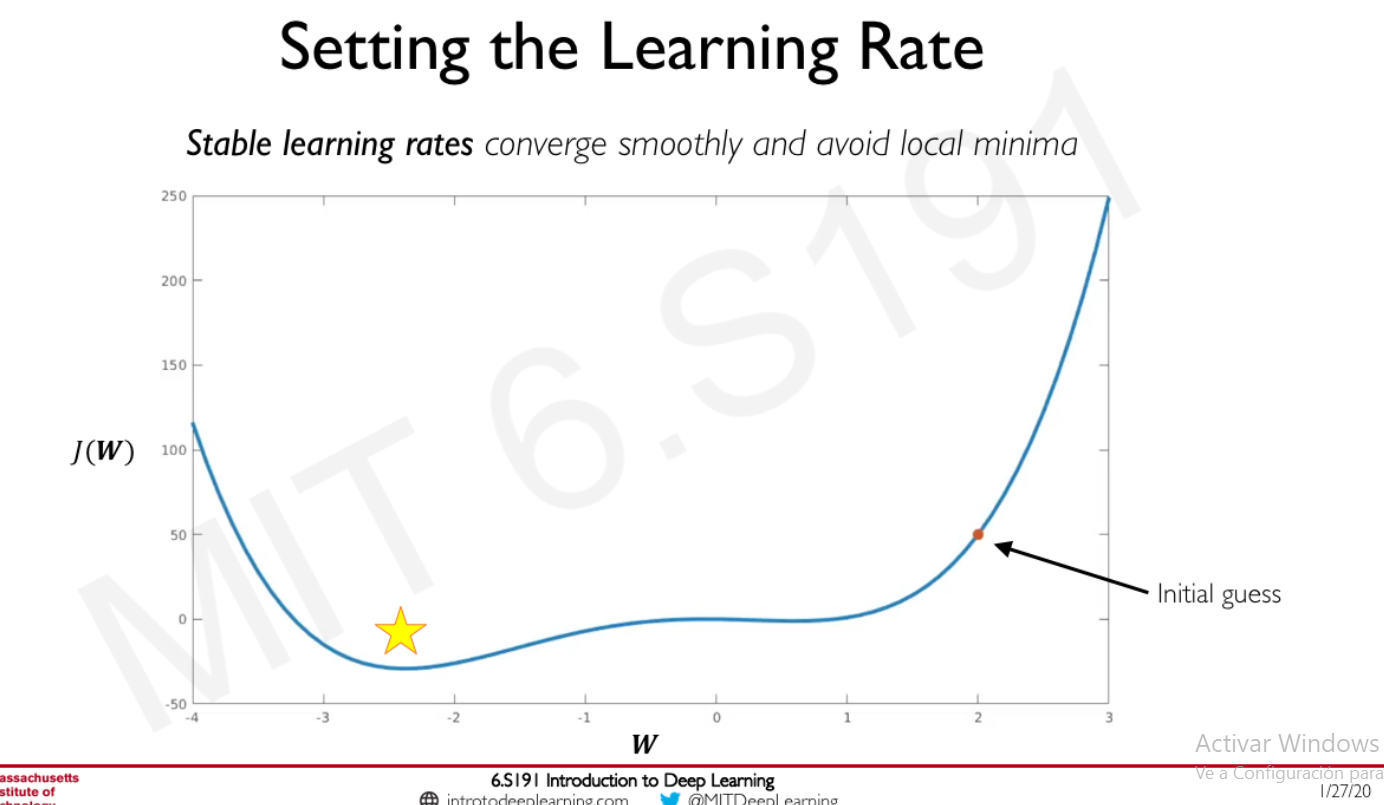

1. Try different learning rates.
2. Adaptative learning rate.
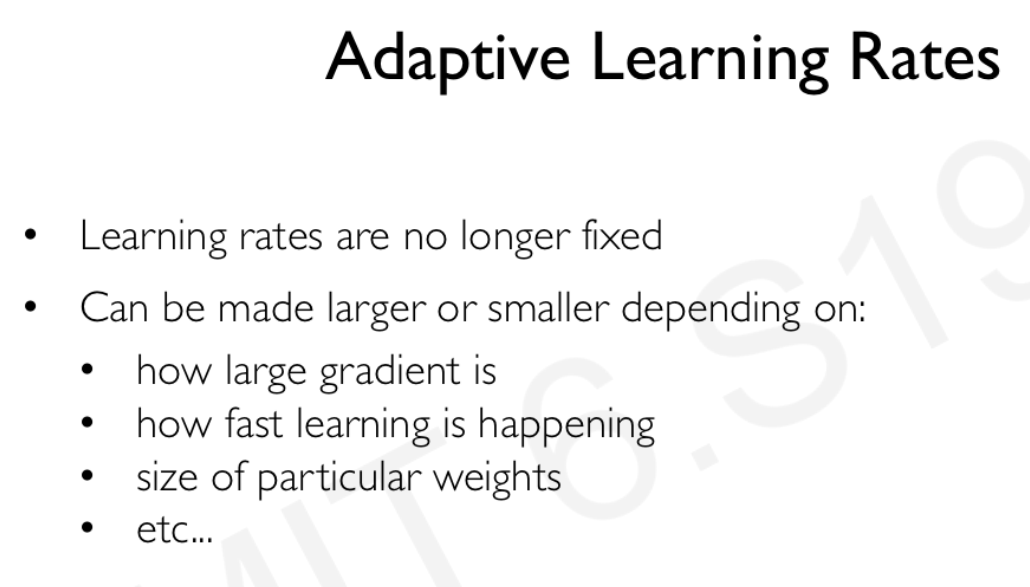

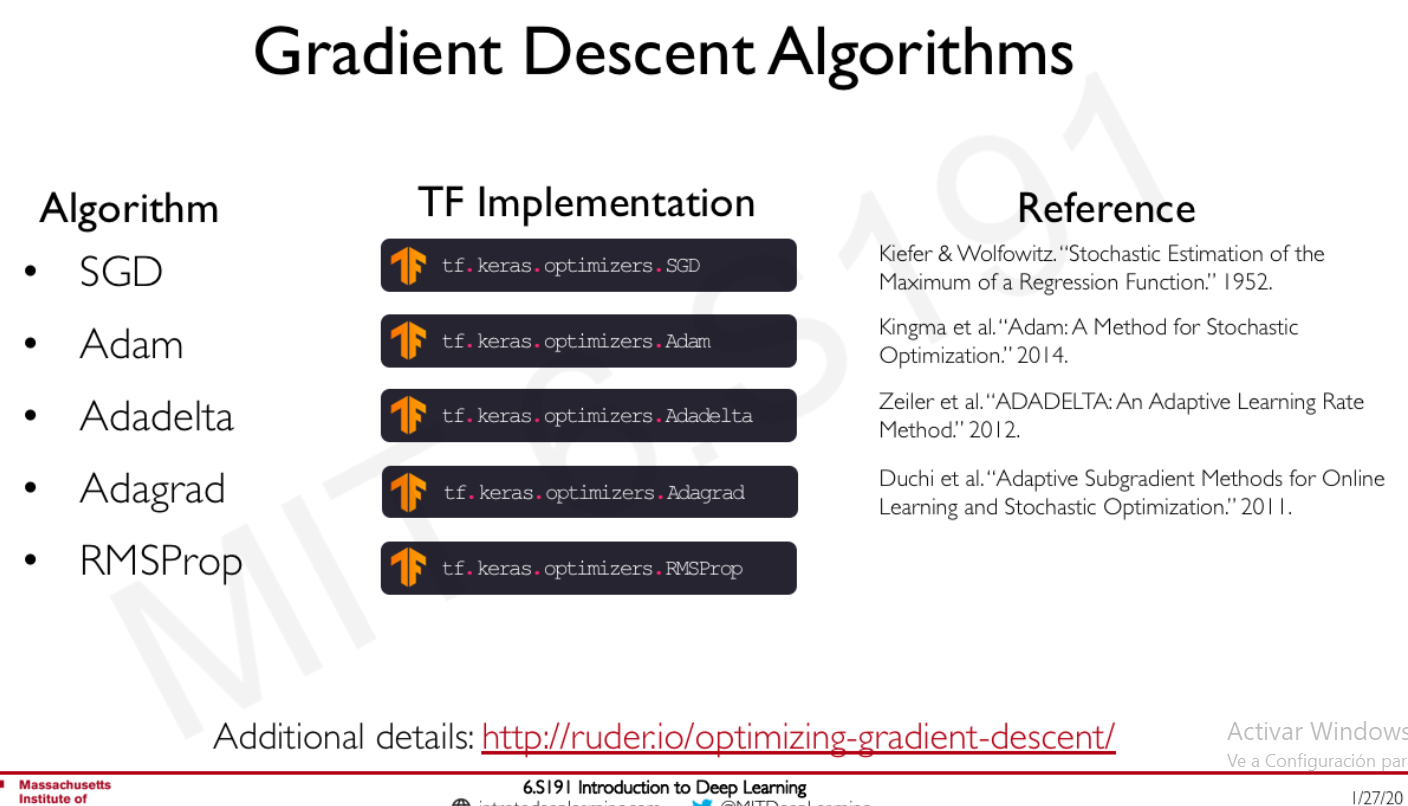

#Stochastic Gradient Descent (SGD)

Iteration 0: Loss = 47.81386184692383
Iteration 100: Loss = 0.796945333480835
Iteration 200: Loss = 0.7947020530700684
Iteration 300: Loss = 0.7884871959686279
Iteration 400: Loss = 0.7853360772132874
Iteration 500: Loss = 0.7835535407066345
Iteration 600: Loss = 0.7822921872138977
Iteration 700: Loss = 0.7810418009757996
Iteration 800: Loss = 0.7798759937286377
Iteration 900: Loss = 0.7788283824920654


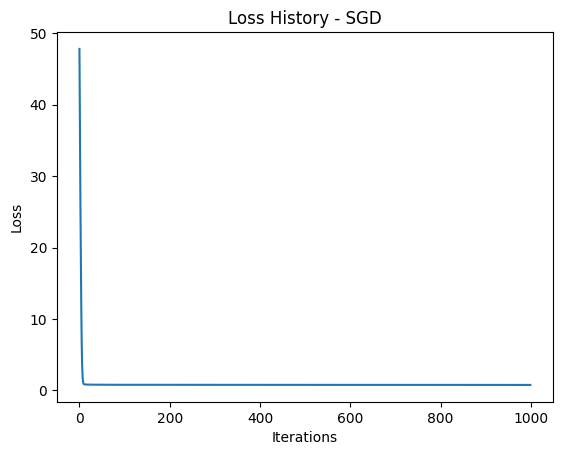

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the model architecture
class SimpleNN(tf.keras.Model):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(10, activation='relu')  # Hidden layer with 10 neurons
        self.output_layer = tf.keras.layers.Dense(1)  # Output layer with 1 neuron

    def call(self, inputs):
        x = self.hidden_layer(inputs)
        return self.output_layer(x)

# Define the loss function (mean squared error)
def compute_loss(model, X, y):
    predictions = model(X)
    return tf.reduce_mean(tf.square(predictions - y))

# Gradient Descent algorithm
def gradient_descent_tf(model, X, y, optimizer, iterations=1000):
    loss_history = []
    for i in range(iterations):
        with tf.GradientTape() as tape:
            loss = compute_loss(model, X, y)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        loss_history.append(loss.numpy())

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss.numpy()}")

    return model, loss_history

# Example usage:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((X.shape[0], 1)), X]
X_b = tf.constant(X_b, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

model = SimpleNN()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model, loss_history = gradient_descent_tf(model, X_b, y, optimizer, iterations=1000)

plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History - SGD')
plt.show()

#2. Adam

Iteration 0: Loss = 0.7778446674346924
Iteration 100: Loss = 0.7689403295516968
Iteration 200: Loss = 0.7689476609230042
Iteration 300: Loss = 0.7689252495765686
Iteration 400: Loss = 0.7689576745033264
Iteration 500: Loss = 0.7689383029937744
Iteration 600: Loss = 0.7689160704612732
Iteration 700: Loss = 0.768922746181488
Iteration 800: Loss = 0.7689675092697144
Iteration 900: Loss = 0.7689388990402222


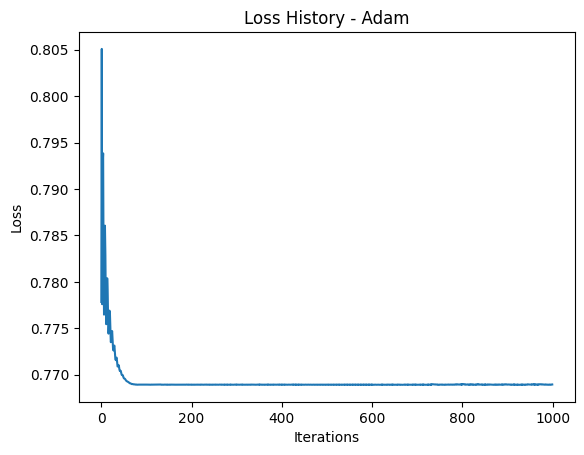

In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model, loss_history = gradient_descent_tf(model, X_b, y, optimizer, iterations=1000)

plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History - Adam')
plt.show()

#3. Adadelta

Iteration 0: Loss = 0.7689552903175354
Iteration 100: Loss = 0.7702540755271912
Iteration 200: Loss = 0.7710999250411987
Iteration 300: Loss = 0.7715310454368591
Iteration 400: Loss = 0.772055447101593
Iteration 500: Loss = 0.7725850939750671
Iteration 600: Loss = 0.7729884386062622
Iteration 700: Loss = 0.7733031511306763
Iteration 800: Loss = 0.773845911026001
Iteration 900: Loss = 0.7741588354110718


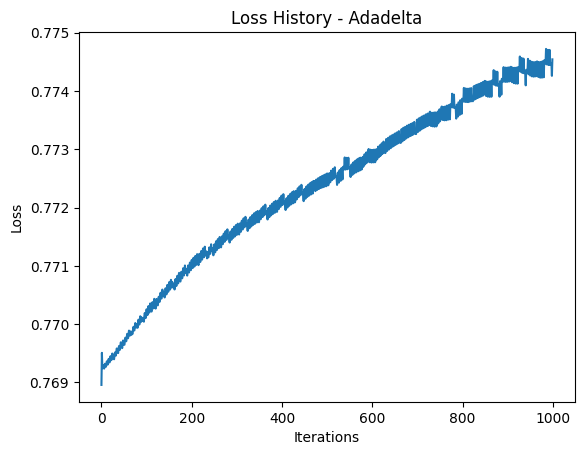

In [9]:
optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0)
model, loss_history = gradient_descent_tf(model, X_b, y, optimizer, iterations=1000)

plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History - Adadelta')
plt.show()

#4. Adagrad

Iteration 0: Loss = 0.7745192646980286
Iteration 100: Loss = 0.7688825130462646
Iteration 200: Loss = 0.7688840627670288
Iteration 300: Loss = 0.7688814401626587
Iteration 400: Loss = 0.7688778638839722
Iteration 500: Loss = 0.768878161907196
Iteration 600: Loss = 0.768876314163208
Iteration 700: Loss = 0.7688729763031006
Iteration 800: Loss = 0.768873929977417
Iteration 900: Loss = 0.7688732743263245


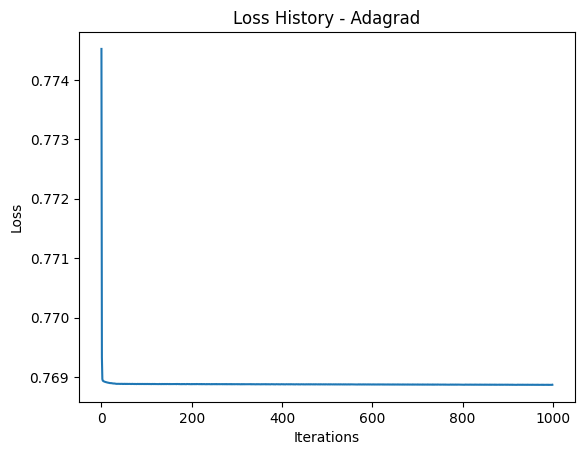

In [10]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model, loss_history = gradient_descent_tf(model, X_b, y, optimizer, iterations=1000)

plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History - Adagrad')
plt.show()

#5. RMSProp

Iteration 0: Loss = 0.7688705921173096
Iteration 100: Loss = 0.7801536321640015
Iteration 200: Loss = 0.779012143611908
Iteration 300: Loss = 0.7786382436752319
Iteration 400: Loss = 0.7776767015457153
Iteration 500: Loss = 0.7765863537788391
Iteration 600: Loss = 0.7747724056243896
Iteration 700: Loss = 0.7745779156684875
Iteration 800: Loss = 0.7721810340881348
Iteration 900: Loss = 0.7716633081436157


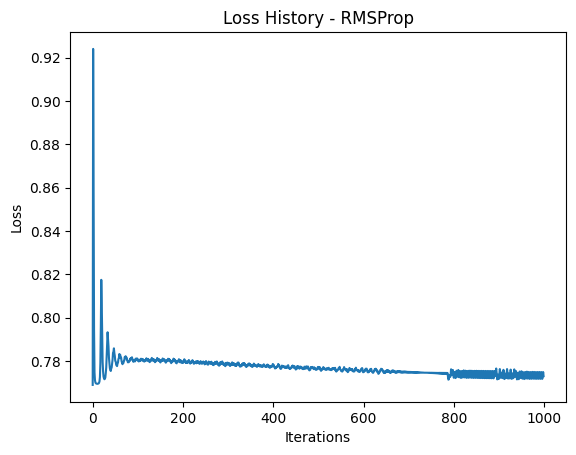

In [11]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model, loss_history = gradient_descent_tf(model, X_b, y, optimizer, iterations=1000)

plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History - RMSProp')
plt.show()
